In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

## Gathering

In [2]:
# 被過濾的 twitter 推文，並且分析了內容
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 用圖片預測狗的品種
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

在 tweet.py 檔案透過 Twitter API 得到資料寫在 tweet_json.txt 裡面

In [4]:
# 有紀錄到按讚數和轉貼數
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

Another way parsing text file to dataframe on the student hub

```
import json
# 讀取 txt 的 json 並裝成 list
with open('tweet_json.txt', mode='r') as file:
    data = [json.loads(line) for line in file]
# 對 data 編碼成 json 字串，再轉成 dataframe
pd.read_json(json.dumps(data))
```

## Accessing

#### Image Predictions

In [5]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions_df.img_num.unique()

array([1, 4, 2, 3])

In [8]:
image_predictions_df.p1_dog.unique()

array([ True, False])

In [9]:
# 查看預測都為 False 的數量
a = image_predictions_df[~image_predictions_df.p1_dog]
b = a[~a.p2_dog]
c = b[~b.p3_dog]
c.shape

(324, 12)

In [10]:
image_predictions_df[image_predictions_df.p1_dog & image_predictions_df.p2_dog].shape[0]

1398

#### Tweet Json

In [11]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [12]:
tweet_json_df.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37750,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8226,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
# 推文本文內容
tweet_json_df.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [14]:
# 推文附件資訊
tweet_json_df.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [15]:
# 使用者資訊
tweet_json_df.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7888923,
 'friends_count': 12,
 'listed_count': 6030,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 141227,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 9931,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/th

檢查 missing data 的欄位

In [16]:
reply = tweet_json_df[tweet_json_df.in_reply_to_status_id_str.notnull()]

In [17]:
# 確認回覆的推文內容
reply.entities.values[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'NonWhiteHat',
   'name': 'Patrick Nonwhite',
   'id': 2281181600,
   'id_str': '2281181600',
   'indices': [0, 12]},
  {'screen_name': 'MayhewMayhem',
   'name': 'Мейхью Мейхем',
   'id': 38308544,
   'id_str': '38308544',
   'indices': [13, 26]}],
 'urls': []}

In [18]:
# 確認回覆的推文內容是不是沒有圖片連結
reply.extended_entities.values[0]

nan

In [19]:
reply.in_reply_to_user_id_str.values[0]

2281181600.0

In [20]:
# 是否為引用推文
sum(tweet_json_df.is_quote_status)

31

In [21]:
tweet_json_df.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [22]:
sum(tweet_json_df.favorited)

0

In [23]:
sum(tweet_json_df.retweeted)

0

In [24]:
sum(tweet_json_df.truncated)

0

In [25]:
# 4196983835 是 @WeRateDogs™
tweet_json_df[tweet_json_df.user.str['id'] != 4196983835].shape

(0, 32)

#### Twitter Archive Enhance

In [26]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
# 確定 tweet_json_df 和 twitter_archive_df 有關聯的 key 是 id 而不是 id_str
print(sum(twitter_archive_df.tweet_id == 892420643555336193))
print(sum(twitter_archive_df.tweet_id == 892420643555336192))

1
0


In [28]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
twitter_archive_df[twitter_archive_df.tweet_id == 891327558926688256].expanded_urls.values

array(['https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'],
      dtype=object)

In [30]:
tweet_json_df[tweet_json_df.id == 891327558926688256].entities.values

array([{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}],
      dtype=object)

In [31]:
tweet_json_df[tweet_json_df.id == 891327558926688256].extended_entities.values

array([{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}, {'id': 891327551947157504, 'id_str': '891327551947157504', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type

## Cleaning

### Tweet json

**移除不要的欄位，contributors、coordinates、geo、possibly_sensitive、possibly_sensitive_appealable、place、display_text_range、entities、favorited、retweeted、truncated、user**
##### _Define_
使用 `pandas` 方法 `drop` 以上欄位
##### _Code_

In [32]:
columns = ['contributors', 'coordinates', 'geo', 'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'display_text_range', 'entities', 'favorited', 'retweeted', 'truncated', 'user']
json_df = tweet_json_df.drop(columns, axis=1)

##### _Test_

In [33]:
json_df.columns

Index(['created_at', 'extended_entities', 'favorite_count', 'full_text', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'retweet_count', 'retweeted_status', 'source'],
      dtype='object')

**移除 extended_entities 缺失資料**
##### _Define_
留下 extended_entities 方法 notnull() 為 True 的資料
##### _Code_

In [34]:
json_df = json_df[json_df.extended_entities.notnull()].copy()

##### _Test_

In [35]:
sum(json_df.extended_entities.isnull())

0

**刪除 in_reply_to_screen_name、in_reply_to_status_id、in_reply_to_status_id_str、in_reply_to_user_id、in_reply_to_user_id_str 有值的數據**

##### _Define_
由於這些欄位為同群組的資訊，因此留下 in_reply_to_status_id 沒有值的數據，其他欄位也就一併處理

##### _Code_

In [36]:
json_df = json_df[json_df.in_reply_to_status_id.isnull()].copy()

##### _Test_

In [37]:
# 結果應為 0
print(json_df.in_reply_to_status_id.count(), 
      json_df.in_reply_to_user_id.count(),
      json_df.in_reply_to_screen_name.count(),
      json_df.in_reply_to_user_id.count(),
      json_df.in_reply_to_user_id_str.count())

0 0 0 0 0


**刪除 is_quote_status 為 True 的數據**
##### _Define_
留下 is_quote_status 為 False 數據

##### _Code_ 

In [38]:
json_df = json_df[~json_df.is_quote_status].copy()

##### _Test_

In [39]:
# 結果應為 0
sum(json_df.is_quote_status)

0

**刪除 retweeted_status 有值的數據**
##### _Define_
留下 retweeted_status 方法 `isnull()` 為 True 的數據
##### _Code_

In [40]:
json_df = json_df[json_df.retweeted_status.isnull()].copy()

##### _Test_

In [41]:
# 應為 0
sum(json_df.retweeted_status.notnull())

0

**檢查剩下資料，移除沒有資料的欄位**
##### _Define_
1. 使用 `info()` 查看哪些欄位資料筆數為 0
2. 使用 `pandas` 方法 `drop` 移除資料筆數為 0 的欄位

##### _Code_

In [42]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2338
Data columns (total 20 columns):
created_at                   1968 non-null datetime64[ns]
extended_entities            1968 non-null object
favorite_count               1968 non-null int64
full_text                    1968 non-null object
id                           1968 non-null int64
id_str                       1968 non-null int64
in_reply_to_screen_name      0 non-null object
in_reply_to_status_id        0 non-null float64
in_reply_to_status_id_str    0 non-null float64
in_reply_to_user_id          0 non-null float64
in_reply_to_user_id_str      0 non-null float64
is_quote_status              1968 non-null bool
lang                         1968 non-null object
quoted_status                0 non-null object
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
quoted_status_permalink      0 non-null object
retweet_count                1968 non-null int64
retweeted_st

In [43]:
columns = ['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted_status']
json_df = json_df.drop(columns, axis=1)

##### _Test_

In [44]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2338
Data columns (total 10 columns):
created_at           1968 non-null datetime64[ns]
extended_entities    1968 non-null object
favorite_count       1968 non-null int64
full_text            1968 non-null object
id                   1968 non-null int64
id_str               1968 non-null int64
is_quote_status      1968 non-null bool
lang                 1968 non-null object
retweet_count        1968 non-null int64
source               1968 non-null object
dtypes: bool(1), datetime64[ns](1), int64(4), object(4)
memory usage: 155.7+ KB


**移除 is_quote_status、extended_entities 欄位**
##### _Define_
use `pandas` method `drop` columns
##### _Code_

In [45]:
json_df = json_df.drop(['is_quote_status', 'extended_entities'], axis=1)

##### _Test_

In [46]:
json_df.columns

Index(['created_at', 'favorite_count', 'full_text', 'id', 'id_str', 'lang',
       'retweet_count', 'source'],
      dtype='object')

**修正 id_str 型別為 str datatype**
#####  _Define_
將 id_str 轉為 str datatype
##### _Code_

In [47]:
json_df.id_str = json_df.id_str.astype('str')

##### _Test_

In [48]:
json_df.id_str.dtype

dtype('O')

**修正 lang 型別為 category datatype**
##### _Define_
將 lang 型別轉為 category datatype
##### _Code_

In [49]:
json_df.lang = json_df.lang.astype('category')

##### _Test_

In [50]:
json_df.lang.dtype

CategoricalDtype(categories=['en', 'et', 'eu', 'in', 'nl'], ordered=False)

**修剪 source 內容不要 html 資訊**
##### _Define_
1. 使用 `unique()` 列出內容
2. 使用 `replace()` 修正內容

##### _Code_

In [51]:
json_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [52]:
replace = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck',
}
json_df.source.replace(replace, inplace=True)

##### _Test_

In [53]:
json_df.head()

,created_at,favorite_count,full_text,id,id_str,lang,retweet_count,source
0,2017-08-01 16:23:56,37750,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,en,8226,iPhone
1,2017-08-01 00:17:27,32434,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,en,6079,iPhone
2,2017-07-31 00:18:03,24430,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,en,4023,iPhone
3,2017-07-30 15:58:51,41088,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,en,8371,iPhone
4,2017-07-29 16:00:24,39282,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,en,9082,iPhone


### Twitter archive enhanced table

**合併 Twitter archive enhanced table 和 Tweet json table**

##### _Define_
1. 建立新 dataframe 裝整理後的 Tweet json table，欄位有 ['id', 'favorite_count', 'lang', 'retweet_count', 'source']
2. 重新命名 new json dataframe 欄位 id 為 tweet_id
3. twitter archive enhanced 移除重複欄位 source、timestamp 並建立新 dataframe `archive_df`
4. 使用 `pandas` method `merge` 將 步驟 2 和 3 得到的 dataframe 合併

##### _Code_

In [54]:
json_df = json_df[['id', 'favorite_count', 'lang', 'retweet_count', 'source']]
json_df.rename(columns={'id': 'tweet_id'}, inplace=True)
archive_df = twitter_archive_df.drop(['source', 'timestamp'], axis=1)
archive_df = pd.merge(archive_df, json_df, on=['tweet_id'])

In [55]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,lang,retweet_count,source
0,892420643555336193,NaN,NaN,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37750,en,8226,iPhone
1,892177421306343426,NaN,NaN,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32434,en,6079,iPhone
2,891815181378084864,NaN,NaN,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,24430,en,4023,iPhone
3,891689557279858688,NaN,NaN,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,41088,en,8371,iPhone
4,891327558926688256,NaN,NaN,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,39282,en,9082,iPhone


**合併後使用 info 檢查資訊，如果欄位沒有任何數據，可直接移除**
##### _Code_

In [56]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 19 columns):
tweet_id                      1968 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
text                          1968 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1968 non-null object
rating_numerator              1968 non-null int64
rating_denominator            1968 non-null int64
name                          1968 non-null object
doggo                         1968 non-null object
floofer                       1968 non-null object
pupper                        1968 non-null object
puppo                         1968 non-null object
favorite_count                1968 non-null int64
lang                          1968 non-null category
retweet_count                 1968 non-

In [57]:
archive_df = archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### _Test_

In [58]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 14 columns):
tweet_id              1968 non-null int64
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
name                  1968 non-null object
doggo                 1968 non-null object
floofer               1968 non-null object
pupper                1968 non-null object
puppo                 1968 non-null object
favorite_count        1968 non-null int64
lang                  1968 non-null category
retweet_count         1968 non-null int64
source                1968 non-null object
dtypes: category(1), int64(5), object(8)
memory usage: 217.4+ KB


**計算 rating_numerator / rating_denominator 並放到新欄位 rating_ratio**
##### _Define_
1. 計算 rating ratio
2. 移除 rating_numerator, rating_denominator

##### _Code_

In [59]:
archive_df['rating_ratio'] = archive_df.rating_numerator / archive_df.rating_denominator

In [60]:
archive_df = archive_df.drop(['rating_numerator', 'rating_denominator'], axis=1)

##### _Test_

In [61]:
archive_df.head()

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,lang,retweet_count,source,rating_ratio
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,37750,en,8226,iPhone,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,32434,en,6079,iPhone,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,24430,en,4023,iPhone,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,41088,en,8371,iPhone,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,39282,en,9082,iPhone,1.2


#### Image prediction table

**刪除查無品種的數據（一共 324筆）**

##### _Define_
留下 p3_dog、p2_dog、p1_dog 其中一個有為 True 的數據

##### _Code_

In [62]:
prediction_df = image_predictions_df[image_predictions_df.p1_dog | image_predictions_df.p2_dog | image_predictions_df.p3_dog].copy()

##### _Test_

In [63]:
prediction_df[~prediction_df.p1_dog & ~prediction_df.p2_dog & ~prediction_df.p3_dog].shape[0]

0

In [64]:
image_predictions_df.shape[0] - prediction_df.shape[0]

324

**依照預測結果優先順序找出狗品種並放到新開欄位 breed**

##### _Define_
1. 建立一個 function 處理邏輯
    - when p1_dog is True then return p1
    - else if when p2_dog is True then return p2
    - else if when p3_dog is True then return p3
2. 使用 dataframe.apply 呼叫 function 並將結果放到新欄位 `breed`
3. keep columns tweet_id, breed

In [65]:
def prediction_integration(s):
    if s.p1_dog:
        return s.p1
    elif s.p2_dog:
        return s.p2
    else:
        return s.p3

In [66]:
prediction_df['breed'] = prediction_df.apply(prediction_integration, axis=1)

In [67]:
prediction_df = prediction_df[['tweet_id', 'breed']]

##### _Test_

In [68]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id    1751 non-null int64
breed       1751 non-null object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


**與 Twitter archive enhanced table 合併**
##### _Define_
使用 `pandas` method `merge` to merge prediction_df and archive_df

##### _Code_

In [69]:
clean_df = pd.merge(archive_df, prediction_df, on='tweet_id')

##### _Test_

In [70]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 14 columns):
tweet_id          1663 non-null int64
text              1663 non-null object
expanded_urls     1663 non-null object
name              1663 non-null object
doggo             1663 non-null object
floofer           1663 non-null object
pupper            1663 non-null object
puppo             1663 non-null object
favorite_count    1663 non-null int64
lang              1663 non-null category
retweet_count     1663 non-null int64
source            1663 non-null object
rating_ratio      1663 non-null float64
breed             1663 non-null object
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 183.7+ KB


## Storing

In [ ]:
# Storing data as csv file
clean_df.to_csv('twitter_archive_master.csv', index=False)

In [ ]:
for item in clean_df.values:
    print(tuple(item))
    break

```
# Storing data to SqlLite
import sqlite3

with sqlite3.connect("homework.sqlite3") as conn:
    command = "INSERT INTO TwitterMaster VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
    for item in clean_df.values:
        conn.execute(command, tuple(item))
    conn.commit()
```

## Analyze

In [90]:
clean_df.describe(include='all')

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,lang,retweet_count,source,rating_ratio,breed
count,1.663000e+03,1663,1663,1663,1663,1663,1663,1663,1663.000000,1663,1663.000000,1663,1663.000000,1663
unique,NaN,1663,1663,850,2,2,2,2,NaN,4,NaN,3,NaN,113
top,NaN,This is Steve. He was just relaxing in hot tub...,https://twitter.com/dog_rates/status/871762521...,None,None,None,None,None,NaN,en,NaN,iPhone,NaN,golden_retriever
freq,NaN,1,1,400,1600,1655,1490,1641,NaN,1658,NaN,1633,NaN,156
mean,7.394515e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9035.465424,NaN,2689.242934,NaN,1.087723,NaN
std,6.798395e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13226.530389,NaN,4871.254705,NaN,0.251692,NaN
min,6.660209e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,11.000000,NaN,0.000000,NaN
25%,6.775390e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2059.000000,NaN,599.000000,NaN,1.000000,NaN
50%,7.141414e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4223.000000,NaN,1343.000000,NaN,1.100000,NaN
75%,7.931884e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11181.500000,NaN,3039.000000,NaN,1.200000,NaN


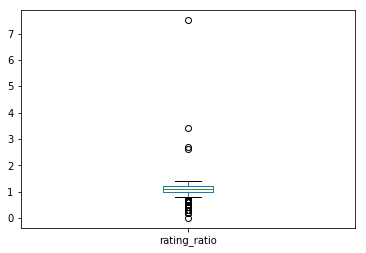

In [95]:
# 針對 rating_ratio 畫箱型圖看資料分佈和特異點
clean_df.rating_ratio.plot.box()
plt.show()

In [71]:
# 資料中一共有多少品種
clean_df.breed.unique().shape[0]

113

In [72]:
max_rating = clean_df.rating_ratio.max()
clean_df.rating_ratio.unique()

array([1.3       , 1.2       , 1.4       , 0.5       , 1.1       ,
       0.6       , 0.        , 1.        , 3.42857143, 7.5       ,
       2.7       , 0.3       , 0.9       , 0.8       , 0.7       ,
       0.4       , 0.81818182, 0.2       , 0.63636364, 2.6       ])

In [74]:
clean_df[clean_df.rating_ratio == max_rating].breed

449    Pomeranian
Name: breed, dtype: object

In [77]:
a = clean_df.breed.value_counts()
a.head()

golden_retriever      156
Labrador_retriever    105
Pembroke               94
Chihuahua              90
pug                    62
Name: breed, dtype: int64

In [84]:
a.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian', 'malamute',
       ...
       'wire-haired_fox_terrier', 'Sussex_spaniel', 'EntleBucher',
       'Irish_wolfhound', 'clumber', 'silky_terrier', 'Japanese_spaniel',
       'Bouvier_des_Flandres', 'standard_schnauzer', 'Scotch_terrier'],
      dtype='object', length=113)

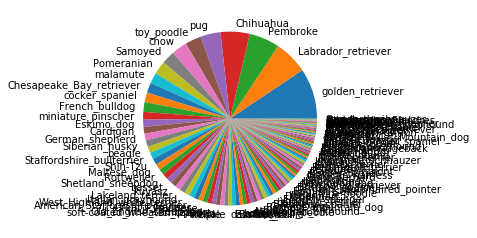

In [86]:
plt.pie(a.values, labels=a.index)
plt.show()